In [2]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools


In [6]:
mycmap = copy.copy(cm.oxy)
mycmap.set_bad('darkgreen')

In [4]:
with xr.open_dataset('mesh_mask_202310b.nc') as mesh:
    tmask = mesh.tmask
    mbathy = mesh.mbathy


with xr.open_dataset('/ocean/atall/MOAD/Model/runs/12aug19_bathy202310b/SalishSea_1h_20190812_20190812_chem_T.nc') as data:
    oxy = data['dissolved_oxygen']



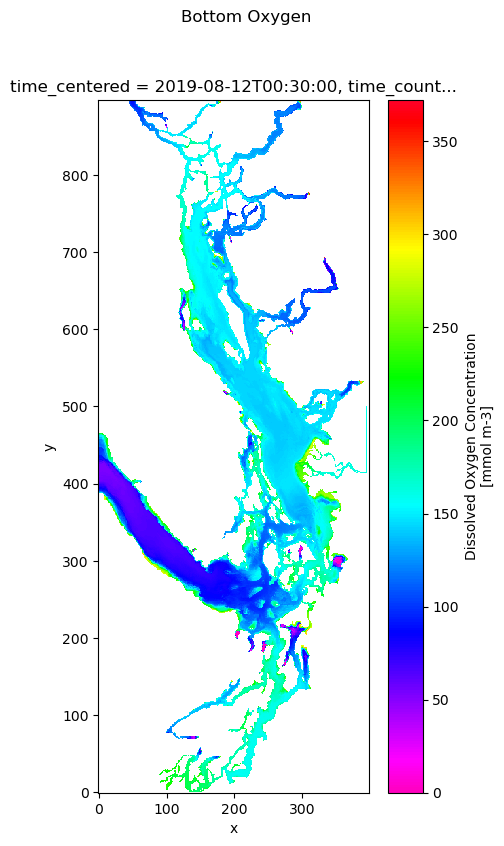

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
oxy[0, mbathy[0, :, :]-1, :, :].where(tmask[0, mbathy[0, :, :]-1, :, :] == 1).plot(ax=ax, cmap='gist_rainbow_r')
viz_tools.set_aspect(ax);
fig.suptitle('Bottom Oxygen');


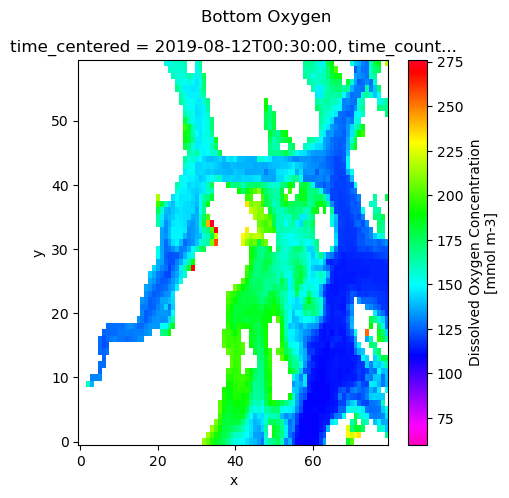

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
oxy[0, mbathy[0, 320:380, 180:260]-1, 320:380, 180:260].where(tmask[0, mbathy[0, 320:380, 180:260]-1, 320:380, 180:260] == 1).plot(ax=ax, vmin=60, cmap='gist_rainbow_r')
#viz_tools.set_aspect(ax);
fig.suptitle('Bottom Oxygen');

#ax.set_xlim([180, 260])
#ax.set_ylim([320, 380])

In [39]:

lonSI1 = -123.58
lonSI2 = -123.44
latSI1 = 48.5
latSI2 = 48.695

In [42]:
dfo_ctd2019 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20190101_20191231.csv')
d2 = dfo_ctd2019[dfo_ctd2019['dtUTC'].between('2019-08-14', '2019-08-15') &  dfo_ctd2019['Lon'].between(lonSI1, lonSI2) & dfo_ctd2019['Lat'].between(latSI1, latSI2) ]

mod202108 = xr.open_dataset('/ocean/atall/MOAD/Model/runs/11-15aug19/SalishSea_1h_20190811_20190815_chem_T.nc')
mod202310 = xr.open_dataset('/ocean/atall/MOAD/Model/runs/12aug19_bathy202310/SalishSea_1h_20190812_20190812_chem_T.nc')
mod202310b = xr.open_dataset('/ocean/atall/MOAD/Model/runs/12aug19_bathy202310b/SalishSea_1h_20190812_20190812_chem_T.nc')
oxy202108 = mod202108.dissolved_oxygen.sel(time_counter='2019-08-12 0:30:00', y=343, x=199)
oxy202310 = mod202310.dissolved_oxygen.sel(time_counter='2019-08-12 0:30:00', y=343, x=199)
oxy202310b = mod202310b.dissolved_oxygen.sel(time_counter='2019-08-12 0:30:00', y=343, x=199)

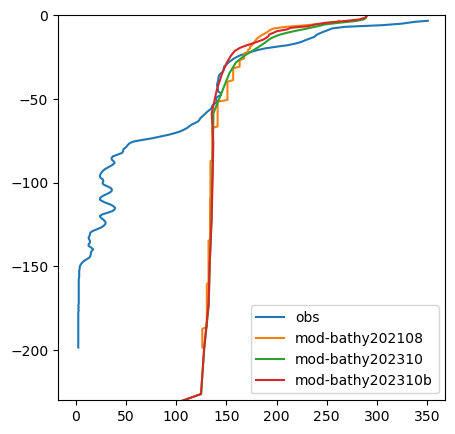

In [43]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5)) 
ax.plot(d2.Oxygen_Dissolved,-d2.Z,label='obs')
ax.plot(d2.mod_dissolved_oxygen,-d2.Z,label='mod-bathy202108')
#ax.plot(oxy202108,-oxy202108.deptht,label='bathy202108')
ax.plot(oxy202310,-oxy202310.deptht,label='mod-bathy202310')
ax.plot(oxy202310b,-oxy202310b.deptht,label='mod-bathy202310b')
ax.set_ylim([-230, 0])
ax.legend()

# Tests: modifying certain parameters (in progress)

In [55]:
# 1st test : horizontal eddy diffusivity from 1.5 to 10
with xr.open_dataset('/ocean/atall/MOAD/Model/runs/12aug19_bathy202310b/test_1st_HDIF10/SalishSea_1h_20190812_20190812_chem_T.nc') as data:
    oxy1 = data['dissolved_oxygen']


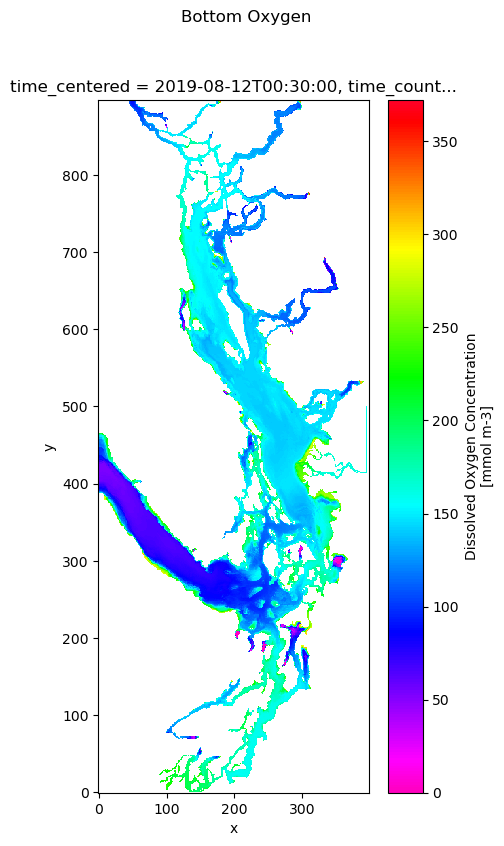

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
oxy1[0, mbathy[0, :, :]-1, :, :].where(tmask[0, mbathy[0, :, :]-1, :, :] == 1).plot(ax=ax, cmap='gist_rainbow_r')
viz_tools.set_aspect(ax);
fig.suptitle('Bottom Oxygen');
